In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
import sklearn.linear_model

In [3]:
df = pd.read_csv('entire_input.csv')
pd.set_option('display.max_columns', None)


In [4]:
df

,Unnamed: 0,timestamp,len_original,dst_mac,src_mac,has_header_802_1q,header_802_1q,ethertype,ip_version,ip_ihl,ip_dscp,ip_ecn,ip_total_length,ip_id,ip_reserved,ip_df,ip_mf,ip_fragment_offset,ip_ttl,ip_proto,ip_header_checksum,ip_src,ip_dst,tcp_src,tcp_dst,tcp_seq_no,tcp_ack_no,tcp_data_off,tcp_reserved,tcp_cwr,tcp_ece,tcp_urg,tcp_ack,tcp_psh,tcp_rst,tcp_syn,tcp_fin,tcp_window,tcp_checksum,tcp_urgent_pointer,tcp_opt_has_max_seg,tcp_opt_max_seg,tcp_opt_has_max_win,tcp_opt_win_scale,tcp_opt_has_sack_perm,tcp_opt_has_sack,tcp_opt_nsack,tcp_opt_sack_11,tcp_opt_sack_12,tcp_opt_sack_21,tcp_opt_sack_22,tcp_opt_sack_31,tcp_opt_sack_32,tcp_opt_sack_41,tcp_opt_sack_42,tcp_opt_has_ts,tcp_opt_ts,tcp_opt_prev_ts,tcp_opt_has_user_to,tcp_opt_user_timeout_gran,tcp_opt_user_timeout,payload_size
0,0,7162871320672435968,66,220687550788451,247168839188091,0,0,2048,4,5,46,0,32,33416,0,1,0,64,56,6,1612,663783418,1972212768,14066,443,3563302501,471739663,8,0,0,0,0,1,0,0,0,0,245,19606,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,257095865,4227032918,0,0,0,0
1,1,7162871320688274944,66,220687550788451,247168839188091,0,0,2048,4,5,46,0,32,36675,0,1,0,64,56,6,17303,663764488,1972212748,37284,443,3359273132,863800831,8,0,0,0,0,1,0,0,0,0,95,23308,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,165161409,1309449400,0,0,0,0
2,2,7162871320688274944,66,220687550788451,247168839188091,0,0,2048,4,5,46,0,32,36676,0,1,0,64,56,6,17302,663764488,1972212748,37284,443,3359273132,863800863,8,0,0,0,0,1,0,0,0,1,95,23269,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,165161415,1309449400,0,0,0,0
3,21231,7162871320688673792,70,247168839188091,220687550788286,1,2164261367,2048,4,5,0,0,32,59827,0,1,0,64,61,6,58590,1972212748,663764488,443,37284,863800863,3359273133,8,0,0,0,0,1,0,0,0,0,67,23241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1309449456,165161415,0,0,0,0
4,3,7162871320693755136,66,220687550788451,215810281522756,0,0,2048,4,5,0,0,32,1769,0,1,0,64,56,6,4481,1786762186,1896643332,47594,443,4208528821,945711652,8,0,0,0,0,1,0,0,0,0,343,61274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,799454133,1309459345,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39601,30789,7162871575059512320,572,247168839188091,220687550788286,1,2164261367,2048,4,5,0,0,534,46730,0,1,0,64,61,6,41886,1972212748,1971872387,443,7651,326372,3247289247,8,0,0,0,0,1,1,0,0,0,70,8786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1309497965,2061988,0,0,0,502
39602,30790,7162871575059512320,101,247168839188091,220687550788286,1,2164261367,2048,4,5,0,0,63,46731,0,1,0,64,61,6,42356,1972212748,1971872387,443,7651,326874,3247289247,8,0,0,0,0,1,1,0,0,0,70,44210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1309497965,2061988,0,0,0,31
39603,30791,7162871575059512320,70,247168839188091,220687550788286,1,2164261367,2048,4,5,0,0,32,46732,0,1,0,64,61,6,42386,1972212748,1971872387,443,7651,326905,3247289247,8,0,0,0,0,1,0,0,0,1,70,58313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1309497965,2061988,0,0,0,0
39604,21229,7162871575062385408,66,220687550788451,247168839188091,0,0,2048,4,5,46,0,32,0,0,1,0,64,56,6,53195,663765271,1972212748,22169,443,492359958,2628336175,8,0,0,0,0,1,0,0,0,0,2003,30837,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,769439672,1309291257,0,0,0,0


In [31]:
state = dict()
xs = []
ys = []
for i, row in df.iterrows():
    #print(row)
    session = (row['ip_src'], row['ip_dst'], row['tcp_src'], row['tcp_dst'])
    
    if session in state and row['ip_src'] != 3232236018:
        xs.append(state[session])
        ys.append(row['ip_id'])
    state[session] = row['ip_id']
xs = np.array(xs).reshape(-1, 1)
ys = np.array(ys).reshape(-1, 1)

KeyboardInterrupt: 

In [ ]:
state_noacanthisitta = dict()
state2 = dict()
state3 = dict()
state4 = dict()
xs_noacanthisitta = []
ys_noacanthisitta = []
for i, row in df.iterrows():
    #print(row)
    session = (row['ip_src'], row['ip_dst'], row['tcp_src'], row['tcp_dst'])
    
    if session in state_noacanthisitta and not(row['tcp_ack'] == 1 and row['tcp_syn'] == 1) and not(state2[session] == 1 and state3[session] == 1) and not state4[session] == 1:
        xs_noacanthisitta.append(state_noacanthisitta[session])
        ys_noacanthisitta.append(row['ip_id'])
    state_noacanthisitta[session] = row['ip_id']
    state2[session] = row['tcp_syn']
    state3[session] = row['tcp_ack']
    state4[session] = row['tcp_rst']
    
xs_noacanthisitta = np.array(xs_noacanthisitta).reshape(-1, 1)
ys_noacanthisitta = np.array(ys_noacanthisitta).reshape(-1, 1)

In [43]:
# 0,0: ipid = 0, syn = 1, ack = 1
# 1,0: ipid != 0, syn = 1, ack = 1
# 0,1: ipid = 0, syn = 0 || ack = 0
# 1,1: ipid != 0, syn = 0 || ack = 0
squares = np.zeros((2,2))
for i, row in df.iterrows():
    #print(row)
    #if row['ip_src'] == 3232236018: # 192.168.1.242 = acanthisitta, known to be linux
    if row['ip_id'] == 0 and row['tcp_syn'] == 1 and row['tcp_ack'] == 1:
        squares[0, 0] += 1
    elif row['ip_id'] != 0 and row['tcp_syn'] == 1 and row['tcp_ack'] == 1:
        squares[1, 0] += 1
    elif row['ip_id'] == 0 and (row['tcp_syn'] == 0 or row['tcp_ack'] == 0):
        squares[0, 1] += 1
    elif row['ip_id'] != 0 and (row['tcp_syn'] == 0 or row['tcp_ack'] == 0):
        squares[1, 1] += 1


KeyboardInterrupt: 

In [5]:
state_ack_no = dict()
base_seq = dict()
base_ack = dict()
xs_ack_no = []
ys_ack_no = []
for i, row in df.iterrows():
    #print(row)
    session = (row['ip_src'], row['ip_dst'], row['tcp_src'], row['tcp_dst'])
    reverse_session = (row['ip_dst'], row['ip_src'], row['tcp_dst'], row['tcp_src'])
    
    if session not in base_ack and row['tcp_ack_no'] != 0:
        base_ack[session] = [row['tcp_ack_no']]
    if session not in base_seq:
        base_seq[session] = [row['tcp_seq_no']]
    if session in state_ack_no and reverse_session in state_ack_no and reverse_session in base_ack and reverse_session in base_seq and session in base_ack:
        xs_ack_no.append(state_ack_no[session] + state_ack_no[reverse_session])# + base_seq[session] + base_seq[reverse_session] + base_ack[session] + base_ack[reverse_session])[[0,1,2,3,4,5,6,7,8,9]])
        #print(state_ack_no[session] + state_ack_no[reverse_session] + base_seq[session] + base_seq[reverse_session] + base_ack[session] + base_ack[reverse_session])
        
        if session in base_ack:
            ys_ack_no.append(row['tcp_ack_no'] - base_ack[session])
        else:
            ys_ack_no.append(0) #lets pray
            #ys_ack_no.append(row['tcp_ack_no'])
        state_ack_no[session] = [row['tcp_ack_no'] - base_ack[session][0], row['tcp_seq_no'] - base_seq[session][0], row['tcp_data_off'], row['len_original']]
    if session not in state_ack_no :
        if session in base_ack:
            state_ack_no[session] = [row['tcp_ack_no'] - base_ack[session][0], row['tcp_seq_no'] - base_seq[session][0], row['tcp_data_off'], row['len_original']]
        else:
            state_ack_no[session] = [0, 0, row['tcp_data_off'], row['len_original']]

xs_ack_no = np.array(xs_ack_no)
ys_ack_no = np.array(ys_ack_no).reshape(-1, 1)

In [ ]:
state_ack_no = dict()
sent_acks = defaultdict(lambda: set())
received_acks = defaultdict(lambda: set())
base_seq = dict()
base_ack = dict()
xs_ack_no = []
ys_ack_no = []
wrong = 0
discarded = 0
for i, row in df.iterrows():
    #print(row)

    session = (row['ip_src'], row['ip_dst'], row['tcp_src'], row['tcp_dst'])
    reverse_session = (row['ip_dst'], row['ip_src'], row['tcp_dst'], row['tcp_src'])
    if row['tcp_ack_no'] in sent_acks[session]:
        ...
    if session in state_ack_no and \
            ((row['tcp_fin'] == 0 and row['tcp_rst'] == 0 and (row['tcp_ack'] == 0 or row['tcp_syn'] == 1)) or \
          (row['tcp_fin'] == 1 and row['tcp_ack'] == 1) or \
            (row['tcp_rst'] == 1 and row['tcp_ack'] == 1) or
            (row['tcp_ack'] == 1 and row['tcp_syn'] == 0 and row['tcp_rst'] == 0 and row['tcp_fin'] == 0 and 
        (row['tcp_ack_no'], row['tcp_seq_no']) not in sent_acks[session] and row['tcp_seq_no'] == max(received_acks[session] or [float('inf')]))): # and reverse_session in state_ack_no:

        xs_ack_no.append(state_ack_no[session])# + state_ack_no[reverse_session])
        #print(state_ack_no[session] + state_ack_no[reverse_session] + base_seq[session] + base_seq[reverse_session] + base_ack[session] + base_ack[reverse_session])
        ys_ack_no.append(row['tcp_seq_no'])
        if row['tcp_seq_no'] != sum(state_ack_no[session]):
            wrong += 1
    elif session in state_ack_no and row['tcp_seq_no'] == sum(state_ack_no[session]):
        discarded += 1
        
    state_ack_no[session] = [row['tcp_seq_no'], row['tcp_syn'], row['payload_size']]
    if row['tcp_fin'] == 1 or row['tcp_rst'] == 1:
        state_ack_no.pop(session)
        sent_acks.pop(reverse_session, None)
    if row['tcp_ack'] == 1 and row['tcp_syn'] == 0 and row['payload_size'] > 0:
        sent_acks[session].add((row['tcp_ack_no'], row['tcp_seq_no']))
        received_acks[session].add(row['tcp_ack_no'])



xs_ack_no = np.array(xs_ack_no)
ys_ack_no = np.array(ys_ack_no).reshape(-1, 1)

In [ ]:
discarded

9603

In [ ]:
wrong

267

Text(1, 1, '34687.0')

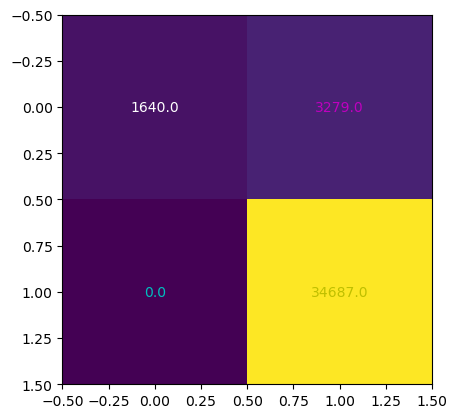

In [144]:
fig, ax = plt.subplots()
im = ax.imshow(squares)
ax.text(0, 0, squares[0, 0], ha="center", va="center", color="w")
ax.text(0, 1, squares[1, 0], ha="center", va="center", color="c")
ax.text(1, 0, squares[0, 1], ha="center", va="center", color="m")
ax.text(1, 1, squares[1, 1], ha="center", va="center", color="y")

In [41]:
cnt

441497

In [47]:
df.columns
sdf = df[['tcp_seq_no', 'tcp_syn', 'payload_size', 'ip_src', 'ip_dst', 'tcp_src', 'tcp_dst']]
#sdf[(sdf.tcp_seq_no // 100000) == 2643]
sdf[(sdf.ip_src == 3232236018) & (sdf.ip_dst == 1588932196)]

,tcp_seq_no,tcp_syn,payload_size,ip_src,ip_dst,tcp_src,tcp_dst
5469,3262135178,1,0,3232236018,1588932196,51413,52223
5472,3262135179,0,0,3232236018,1588932196,51413,52223
7414,3262135179,0,0,3232236018,1588932196,51413,52223
18339,3262135179,0,68,3232236018,1588932196,51413,52223
53515,4135593773,1,0,3232236018,1588932196,51413,45887
...,...,...,...,...,...,...,...
489847,3331348445,0,0,3232236018,1588932196,51413,31868
489863,3331348446,0,0,3232236018,1588932196,51413,31868
493093,21567505,0,0,3232236018,1588932196,51413,34662
493807,394013499,1,0,3232236018,1588932196,51413,25560


In [32]:
(9167+13627)/(9167+162+13627)

0.9929430214323053

-8008325607456088296

217132644667751566

In [433]:
xs

array([[33416],
       [33417],
       [33418],
       ...,
       [29558],
       [29559],
       [29560]], shape=(36150, 1))

In [7]:
r = sklearn.linear_model.LinearRegression()

In [35]:
r.fit(xs_ack_no, ys_ack_no)

LinearRegression()

In [36]:
ys2 = r.predict(xs_ack_no)

In [24]:
ys2

array([4.20800743e+09, 6.62746877e+08, 6.62746878e+08, ...,
       4.18606991e+09, 4.18606991e+09, 1.03860026e+09], shape=(31030,))

np.float64(2.3367362828565584e+16)

In [37]:
r.coef_

array([[ 9.99835823e-01, -9.85613427e+05, -4.10333082e+01]])

In [12]:
r.intercept_

array([333953.19745111])

In [26]:
r.score(xs_ack_no, ys_ack_no)

0.999708243823847

In [424]:
xs_ack_no.shape

(34185, 3)

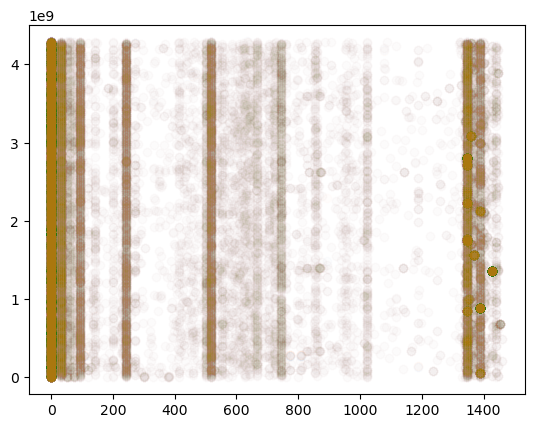

In [46]:
plt.scatter(xs_ack_no[:, 0], ys_ack_no, alpha=0.01) 
plt.scatter(xs_ack_no[:, 2], ys2, alpha=0.01)


In [288]:
rr = np.unique_counts(ys_ack_no - ys2)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   5.,   6.,  14.,  19.,  24.,  15.,  24.,  36.,  27.,
         38.,  50.,  66.,  74.,  99.,  80., 109., 124.,  75., 426.,  91.,
        128., 102., 130., 121., 136., 146., 166., 188., 518., 138., 209.,
        194., 145., 186., 156., 157., 177., 151., 183., 178., 214., 167.,
        206., 170., 153., 182., 192., 213., 205., 184., 241., 127., 179.,
        145., 130., 180., 171., 162., 197., 170., 551., 150., 214., 181.,
        191., 174., 183., 216., 145., 201., 171., 159., 176., 162., 179.,
        164., 139., 120., 151., 130., 141., 141.,  97., 133., 113.,  94.,
         81.,  61.,  72.,  59.,  58.,  64.,  75.,  78.,  59.,  71.,  35.,
         43.,  31.,  22.,  26.,  20.,  16.,  10.,   9.,   9.,  17.,  15.,
         14.,   5.,  12.,   1.,  11., 

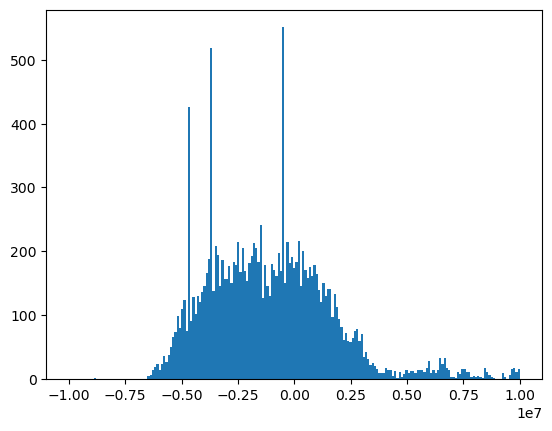

In [326]:
plt.hist(ys_ack_no - ys2, bins=201, range=(-1e7, 1e7))

In [214]:
v = list(zip(rr.values, rr.counts))

In [215]:
v

[(np.int64(-6940), np.int64(1)),
 (np.int64(-3206), np.int64(1)),
 (np.int64(-2498), np.int64(2)),
 (np.int64(-2053), np.int64(1)),
 (np.int64(-2041), np.int64(1)),
 (np.int64(-1993), np.int64(1)),
 (np.int64(-893), np.int64(1)),
 (np.int64(-885), np.int64(6)),
 (np.int64(-884), np.int64(2)),
 (np.int64(-759), np.int64(1)),
 (np.int64(-745), np.int64(4)),
 (np.int64(-614), np.int64(1)),
 (np.int64(-585), np.int64(2)),
 (np.int64(-570), np.int64(1)),
 (np.int64(-545), np.int64(1)),
 (np.int64(-534), np.int64(4)),
 (np.int64(-389), np.int64(1)),
 (np.int64(-369), np.int64(1)),
 (np.int64(-32), np.int64(4)),
 (np.int64(-1), np.int64(61)),
 (np.int64(0), np.int64(17858)),
 (np.int64(1), np.int64(1972)),
 (np.int64(2), np.int64(1)),
 (np.int64(5), np.int64(1)),
 (np.int64(6), np.int64(2)),
 (np.int64(8), np.int64(1)),
 (np.int64(10), np.int64(1)),
 (np.int64(11), np.int64(1)),
 (np.int64(14), np.int64(1)),
 (np.int64(15), np.int64(1)),
 (np.int64(18), np.int64(1)),
 (np.int64(19), np.int64(